## **NYC Taxi Fare Price Prediction**

#### **Importing Necessary Libraries**

In [95]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
print("Libraries imported successfully!")


Libraries imported successfully!


#### **Reading Data**

In [96]:
fare_data_raw = pd.read_csv('data/train.csv',low_memory=False, nrows=10**5, parse_dates=['pickup_datetime'])
fare_data_raw.drop(['key'],axis = 1, inplace = True)

- Why do we drop the 'key' column?

In [97]:
fare_data_raw.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [98]:
print("Dataset shape: ",fare_data_raw.shape)

Dataset shape:  (100000, 7)


#### **Data Preparation**

**Data fields**

**Features**
- **pickup_datetime** - timestamp value indicating when the taxi ride started.

- **pickup_longitude** - float for longitude coordinate of where the taxi ride started.

- **pickup_latitude** - float for latitude coordinate of where the taxi ride started.

- **dropoff_longitude** - float for longitude coordinate of where the taxi ride ended.

- **dropoff_latitude** - float for latitude coordinate of where the taxi ride ended.

- **passenger_count** - integer indicating the number of passengers in the taxi ride.

**Target**
- **fare_amount** - float dollar amount of the cost of the taxi ride. 

**Checking Data-types and null-values**

In [99]:
fare_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        100000 non-null  float64            
 1   pickup_datetime    100000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   100000 non-null  float64            
 3   pickup_latitude    100000 non-null  float64            
 4   dropoff_longitude  100000 non-null  float64            
 5   dropoff_latitude   100000 non-null  float64            
 6   passenger_count    100000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 5.3 MB


**Creating datetime features based on pickup_datetime**

In [100]:
import calendar

fare_data_raw['pickup_date'] = fare_data_raw['pickup_datetime'].dt.date
fare_data_raw['pickup_day'] = fare_data_raw['pickup_datetime'].apply(lambda x :x.day)
fare_data_raw['pickup_hour'] = fare_data_raw['pickup_datetime'].apply(lambda x :x.hour)
fare_data_raw['pickup_day_of_week'] = fare_data_raw['pickup_datetime'].apply(lambda x :calendar.day_name[x.weekday()])
fare_data_raw['pickup_month'] = fare_data_raw['pickup_datetime'].apply(lambda x :x.month)
fare_data_raw['pickup_year'] = fare_data_raw['pickup_datetime'].apply(lambda x :x.year)

fare_data_raw.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010


In [101]:
# Describe Data
fare_data_raw.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_month,pickup_year
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,11.354652,-72.494682,39.914481,-72.490967,39.919053,1.673820,15.664270,13.495110,6.261230,2011.74389
std,9.716777,10.693934,6.225686,10.471386,6.213427,1.300171,8.677631,6.507434,3.450569,1.86602
min,-44.900000,-736.550000,-74.007670,-84.654241,-74.006377,0.000000,1.000000,0.000000,1.000000,2009.00000
25%,6.000000,-73.992041,40.734996,-73.991215,40.734182,1.000000,8.000000,9.000000,3.000000,2010.00000
50%,8.500000,-73.981789,40.752765,-73.980000,40.753243,1.000000,16.000000,14.000000,6.000000,2012.00000
75%,12.500000,-73.966982,40.767258,-73.963433,40.768166,2.000000,23.000000,19.000000,9.000000,2013.00000
max,200.000000,40.787575,401.083332,40.851027,404.616667,6.000000,31.000000,23.000000,12.000000,2015.00000


**Summary**

- Minimum fare must be positive, not a negative value.
- Minimum and Maximum Longitude and Latitude looks unreal, should be in a range of 71 to 40.
- Minimum passenger count is 0.

**Next Steps:** 
- Remove the rows with 0 passenger count.
- The taxi fare initial charge is $2.5, so fare amount smaller than that amount must be removed. 

In [102]:
# Removing Outlier values
fare_data_raw = fare_data_raw[(fare_data_raw['pickup_longitude'] > -78)&(fare_data_raw['pickup_longitude'] < -70)
                              &(fare_data_raw['dropoff_longitude'] > -78)&(fare_data_raw['dropoff_longitude'] < -70)
                              &(fare_data_raw['pickup_latitude'] > 37)&(fare_data_raw['pickup_latitude'] < 45)
                              &(fare_data_raw['dropoff_latitude'] > 37)&(fare_data_raw['dropoff_latitude'] < 45)
                              &(fare_data_raw['passenger_count'] > 0)
                              &(fare_data_raw['fare_amount'] >= 2.5)]


**Re-check for anomalies**

In [103]:
fare_data_raw.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_month,pickup_year
count,97549.000000,97549.000000,97549.000000,97549.000000,97549.000000,97549.000000,97549.000000,97549.000000,97549.000000,97549.000000
mean,11.354236,-73.975142,40.751032,-73.974017,40.751466,1.680386,15.663000,13.492870,6.264144,2011.743267
std,9.698185,0.043751,0.036181,0.039904,0.037161,1.298536,8.676972,6.505561,3.451690,1.871159
min,2.500000,-75.425388,38.754215,-75.354559,39.296307,1.000000,1.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992266,40.736642,-73.991395,40.735762,1.000000,8.000000,9.000000,3.000000,2010.000000
50%,8.500000,-73.982076,40.753531,-73.980437,40.753962,1.000000,16.000000,14.000000,6.000000,2012.000000
75%,12.500000,-73.968287,40.767677,-73.965127,40.768476,2.000000,23.000000,19.000000,9.000000,2013.000000
max,200.000000,-70.140793,43.183332,-72.854940,43.415190,6.000000,31.000000,23.000000,12.000000,2015.000000


All clear. Moving to next steps.

#### **Elementry Data Analysis 📊**

**Visualizing the Target Variable**

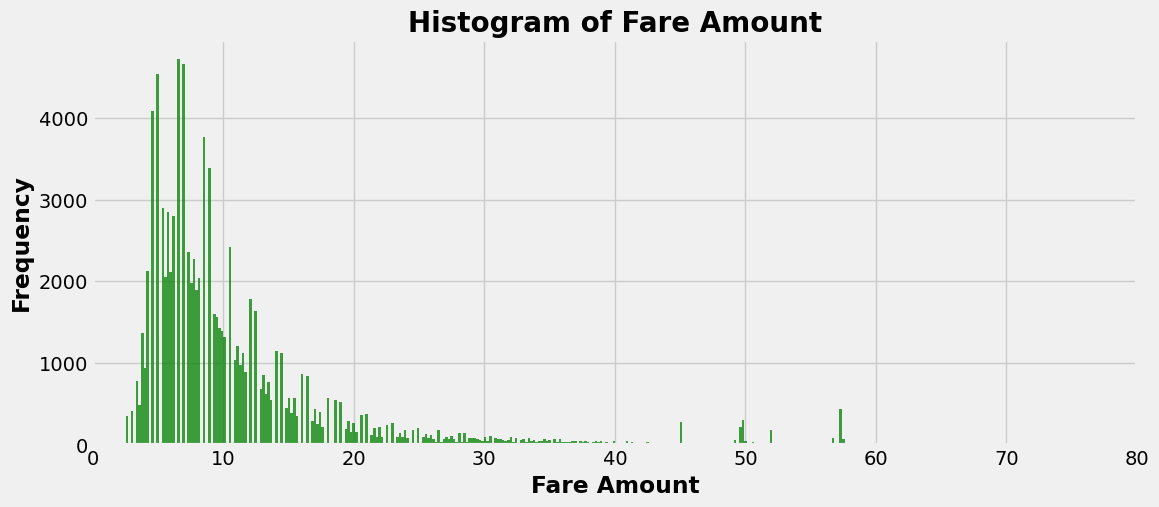

In [104]:
plt.figure(figsize=(12,5))
n, bins, patches = plt.hist(fare_data_raw.fare_amount, 1000, facecolor= 'green', alpha = 0.75)
plt.xlabel('Fare Amount',fontweight= 'bold')
plt.ylabel('Frequency',fontweight= 'bold')
plt.title('Histogram of Fare Amount', fontsize = 20, fontweight= 'bold')
plt.xlim(0,80)
plt.show();

Text(0.5, 1.0, 'Distribution of Fare Amount in Log Scale')

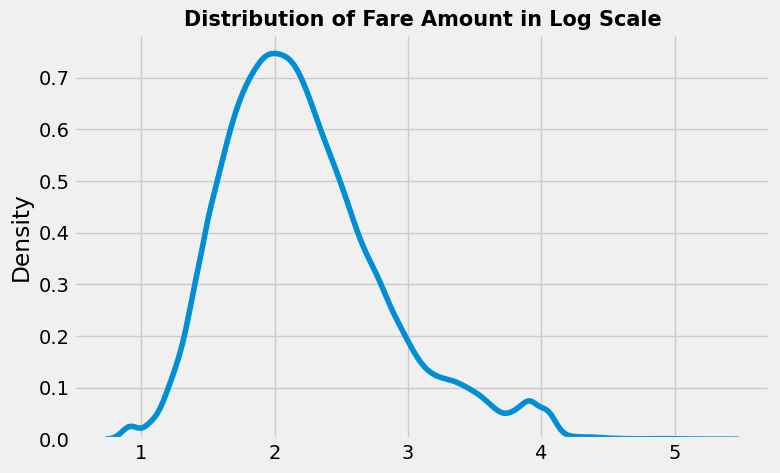

In [105]:
plt.figure(figsize=(8,5))

sns.kdeplot(np.log(fare_data_raw.fare_amount.values)).set_title(
    "Distribution of Fare Amount in Log Scale",fontsize = 15,fontweight='bold'
)

Thus, the distribution of fare_amount is normally distributed.

**Analyzing Top 5 fare Amount**

In [106]:
fare_data_raw['fare_amount'].value_counts(normalize=True).iloc[:5]

6.5    0.048078
4.5    0.041630
8.5    0.038329
5.3    0.029267
5.7    0.028796
Name: fare_amount, dtype: float64

**Visualizing Passenger Counts**

Text(0, 0.5, 'Count')

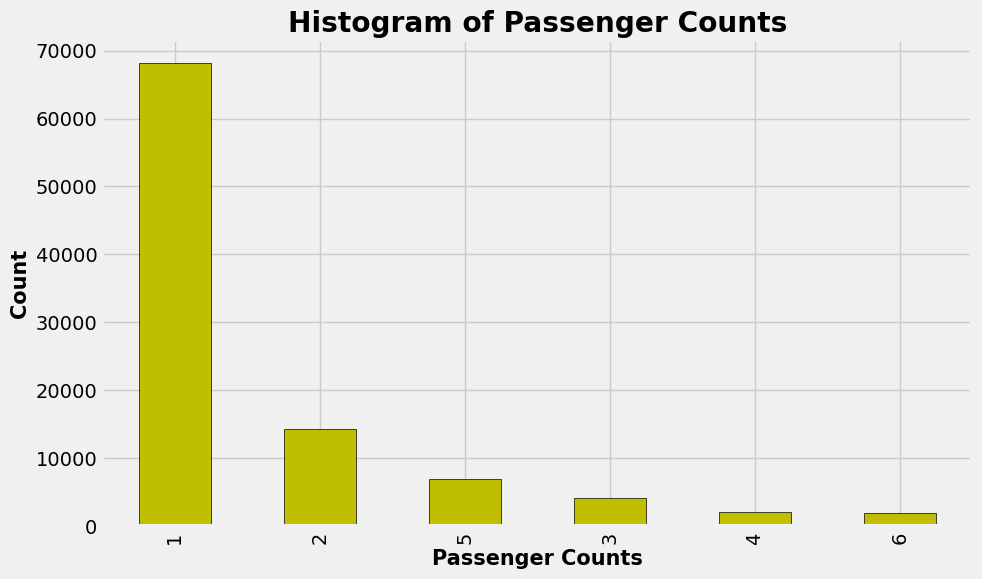

In [107]:
plt.figure(figsize=(10,6))
fare_data_raw['passenger_count'].value_counts().plot.bar(color='y', edgecolor = 'k');
plt.title('Histogram of Passenger Counts',fontweight='bold');
plt.xlabel('Passenger Counts',fontsize = 15,fontweight = 'bold')
plt.ylabel('Count',fontsize = 15,fontweight = 'bold')

**Notable Insights from above graph:**

- Most people have travelled alone (1).
- A group of 5 people have travlled more than A group of 3 people.

**Total Pickups in Year**

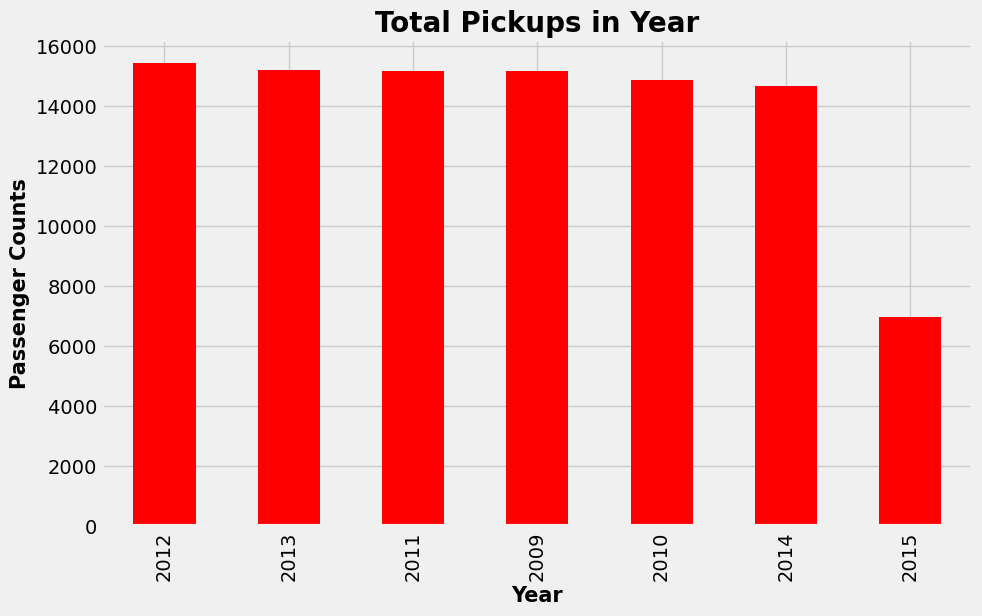

In [108]:
plt.figure(figsize=(10,6))
fare_data_raw['pickup_year'].value_counts().plot.bar(color = 'r')
plt.title('Total Pickups in Year',fontsize = 20, fontweight = 'bold')
plt.xlabel('Year',fontsize = 15, fontweight = 'bold')
plt.ylabel('Passenger Counts', fontsize = 15, fontweight = 'bold')
plt.show()

The above graph has half the pickups in 2015 than the rest of the years because, in the beginning we imported only 1,00,000 rows in which some data of year 2015 was cut. So, we can say that each year approximately 14,000 - 16,000 pickups were made.

**Total Pickup in Weekdays**

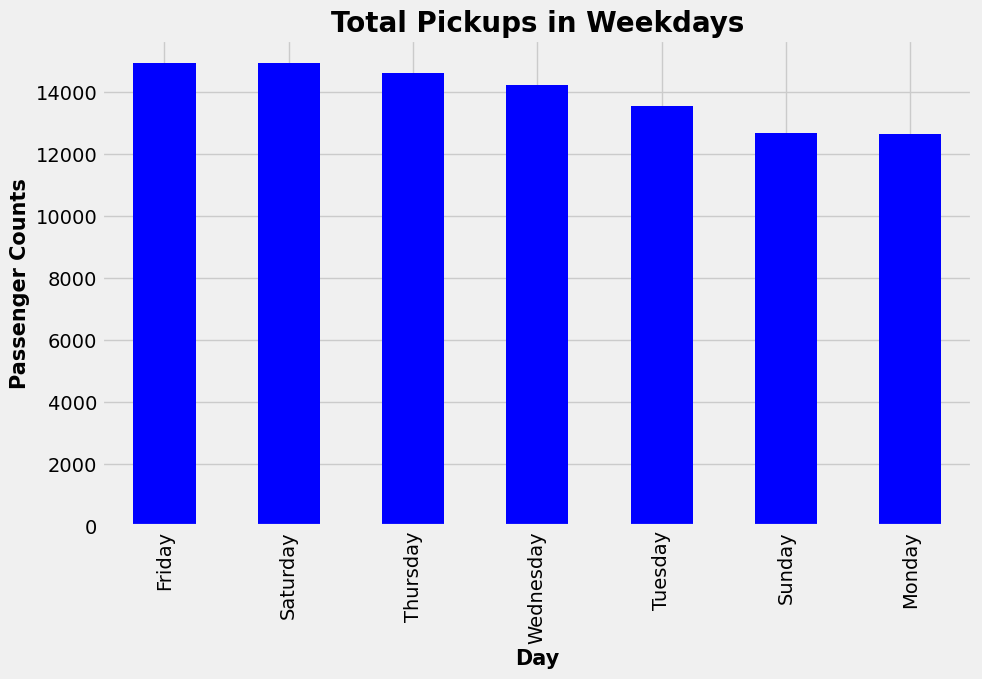

In [109]:
plt.figure(figsize=(10,6))
fare_data_raw['pickup_day_of_week'].value_counts().plot.bar(color = 'b')
plt.title('Total Pickups in Weekdays',fontsize = 20, fontweight = 'bold')
plt.xlabel('Day',fontsize = 15, fontweight = 'bold')
plt.ylabel('Passenger Counts', fontsize = 15, fontweight = 'bold')
plt.show()

**Plot heatmap of Pickups and Dropoffs within New York**

(-74.03, -73.75)

<Figure size 1200x600 with 0 Axes>

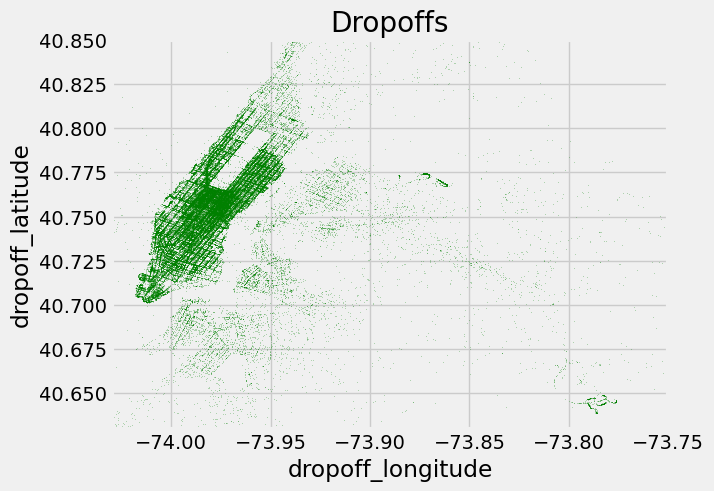

In [110]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

plt.figure(figsize=(12,6))
fare_data_raw.plot(kind = 'scatter',
                   x = 'dropoff_longitude',
                   y = 'dropoff_latitude',
                   color= 'green',
                   s = 0.02,
                   alpha = 0.6)
plt.title('Dropoffs')

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

(-74.03, -73.75)

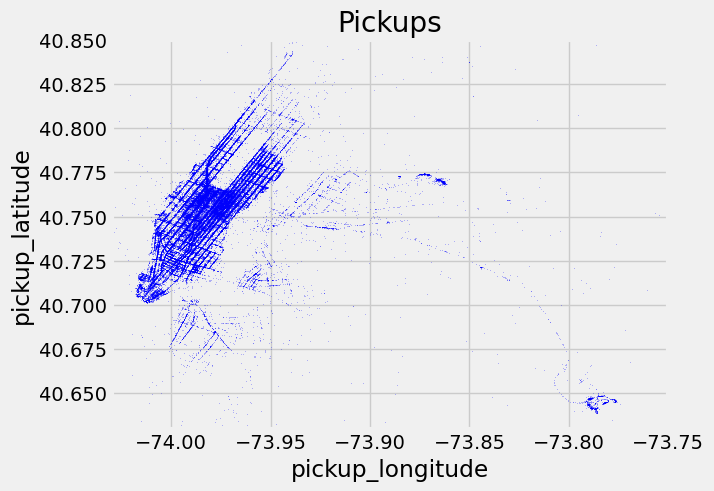

In [111]:
fare_data_raw.plot(kind = 'scatter',
                   x = 'pickup_longitude',
                   y = 'pickup_latitude',
                   color= 'blue',
                   s = 0.02,
                   alpha = 0.6)
plt.title('Pickups')

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

#### **Calculating Distance between 2 geo-locations**

**Using Haversine Distance**

The Haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes.

$$
D(x, y) = 2 \arcsin\left(\sqrt{\sin^2\left(\frac{x_{\text{lat}} - y_{\text{lat}}}{2}\right) + \cos(x_{\text{lat}}) \cos(y_{\text{lat}}) \sin^2\left(\frac{x_{\text{lon}} - y_{\text{lon}}}{2}\right)}\right)
$$

Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.haversine_distances.html 

Info: https://en.wikipedia.org/wiki/Haversine_formula

In [121]:
import numpy as np

def distance(lat1, lon1, lat2, lon2):
    p = np.pi / 180  # Convert degrees to radians
    lat1, lon1, lat2, lon2 = lat1 * p, lon1 * p, lat2 * p, lon2 * p
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    return 3958.8 * c  # Distance in miles

# test:
# print(distance(40.721319, -73.844311, 40.712278, -73.841610))

# Applying the distance function row-wise
fare_data_raw['distance_miles'] = fare_data_raw.apply(
    lambda row: distance(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']),
    axis=1
)

fare_data_raw.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.640494
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,5.250728
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.863421
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,1.739405
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,1.242232


**Distribution of Distance in Miles**

Text(0.5, 1.0, 'Distribution Distance in Miles')

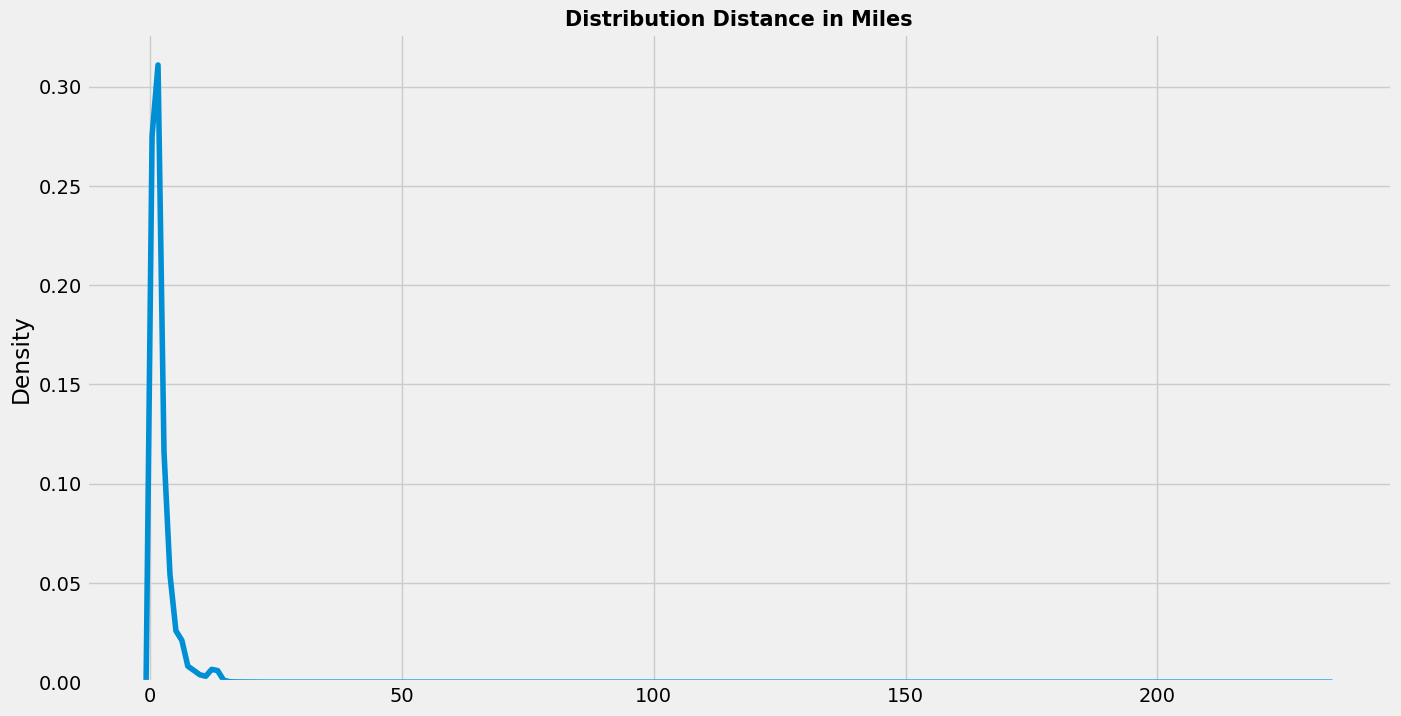

In [124]:
plt.figure(figsize=(15,8))
sns.kdeplot(fare_data_raw['distance_miles'].values).set_title(
    "Distribution Distance in Miles", fontsize=15, fontweight='bold'
)

**Visualizing the Pickup Locations on Map**

In [132]:
# !pip install folium -q
import folium

pickup_locations = folium.Map(location=[40.767937, -73.982155], tiles= 'OpenStreetMap', zoom_start = 12)

for each in fare_data_raw[:500].iterrows():
    folium.CircleMarker([each[1]['pickup_latitude'], each[1]['pickup_longitude']], 
                        radius=3,
                        color = 'blue',
                        popup=str(each[1]['pickup_latitude'])+','+str(each[1]['pickup_longitude']),
                        fill_color='red').add_to(pickup_locations)
                
pickup_locations

**Visualizing the Dropoff Locations on Map**

In [133]:
import folium

pickup_locations = folium.Map(location=[40.767937, -73.982155], tiles= 'OpenStreetMap', zoom_start = 12)

for each in fare_data_raw[:500].iterrows():
    folium.CircleMarker([each[1]['dropoff_latitude'], each[1]['dropoff_longitude']], 
                        radius=3,
                        color = 'red',
                        popup=str(each[1]['dropoff_latitude'])+','+str(each[1]['dropoff_longitude']),
                        fill_color='red').add_to(pickup_locations)
                
pickup_locations

#### **Pre-processing for ML Model**

In [143]:
df = fare_data_raw.copy()
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.640494
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,5.250728
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.863421
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,1.739405
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,1.242232


**Imputing Categorical Variables**

In [144]:
variables = {'Monday' : 1, 'Tuesday' : 2, 'Wednesday' : 3, 'Thursday' : 4, 'Friday' : 5,  'Saturday' : 6, 'Sunday' : 7}
year = {2012: 1, 2013: 2, 2011: 3, 2009:4, 2010: 5, 2014: 6, 2015:7}

df['pickup_year'] = df.pickup_year.map(year)
df['pickup_day_of_week'] = df.pickup_day_of_week.map(variables)

df.drop(['pickup_datetime','pickup_date'],axis = 1, inplace=True)
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,4,0.640494
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,5,5.250728
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,3,0.863421
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,1,1.739405
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,5,1.242232


**Train-Test Split**

In [146]:
from sklearn.model_selection import train_test_split

X = df.drop(['fare_amount'],axis = 1)
y = df['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [147]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (68284, 11)
Shape of X_test:  (29265, 11)
Shape of y_train:  (68284,)
Shape of y_test:  (29265,)


**Linear Regression Model**

In [148]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error

print("Test RMSE: %.3f "% mean_squared_error(y_test,y_pred) ** 0.5)

Test RMSE: 7.037 


**Random Forest Regression Model**

In [151]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 5, random_state = 0, n_estimators =200)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

from sklearn.metrics import mean_squared_error

print("Test RMSE: %.3f "% mean_squared_error(y_test,y_pred) ** 0.5)

Test RMSE: 4.612 


In [152]:
import pickle

# Save the trained model as a pickle string

pickle.dump(rf, open('rf','wb'))

#### **Final Application**

In [153]:
import folium

Enter_coords = folium.Map(location=[40.767937,-73.982155], tiles= 'OpenStreetMap', zoom_start=12)

popup = folium.LatLngPopup()
popup = folium.ClickForMarker()

Enter_coords.add_child(popup)

Enter_coords